In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("First output.csv")

In [3]:
data["score"] = pd.to_numeric(data["score"], errors="coerce")

In [4]:
data = data.dropna()

In [5]:
data.loc[:, "Case"] = data["score"].transform(lambda x: "Positive" if x >= 4 else "Negative") 

In [6]:
data["Case"].value_counts()

Case
Positive    814
Negative     49
Name: count, dtype: int64

<Axes: xlabel='Case'>

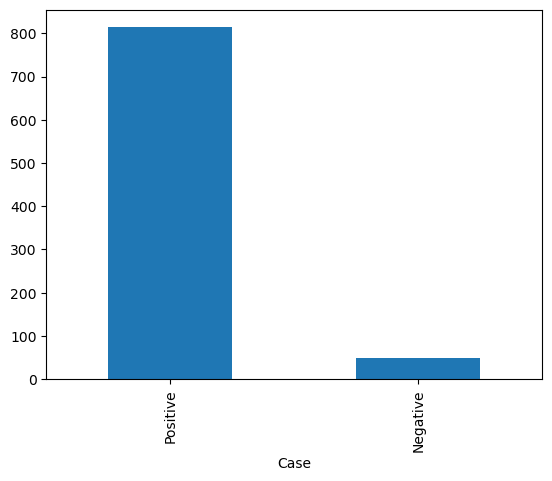

In [7]:
data["Case"].value_counts().plot(kind="bar")

In [8]:
data["score"].value_counts()

score
5.0    327
4.0    322
4.5    165
1.0     21
0.5     16
2.0     10
1.5      2
Name: count, dtype: int64

In [9]:
data[data["Case"] == "Negative"]

,entry_id,offer_ref,review_text,score,Case
0,14633464,103592649,Ten sam projektor ale z innym logo widziałem o...,1.0,Negative
1,15234194,100038918,Nie wiem kto pisze te wszystkie opinie ale ten...,1.5,Negative
2,13151780,96703997,Słaby. Parametry podane w danych technicznych ...,1.0,Negative
20,17607160,146778223,Nie dostałem produktu,0.5,Negative
34,17607158,128004375,Nie dostałem produktu,0.5,Negative
44,17716940,140558095,Kamera nie spełniła moich oczekiwań. Wykrywani...,2.0,Negative
51,17323092,118174705,Już trzy tygodnie czekam na pieniądze za zwróc...,0.5,Negative
74,16818026,98447371,zz,0.5,Negative
78,15538951,32233021,efef,1.0,Negative
85,15917212,49753246,Ta szklarnia to beznadziejny produkt. Wykonana...,1.0,Negative


In [10]:
data_fixed = pd.read_csv("./second output.csv")

In [11]:
data_fixed["score"] = pd.to_numeric(data_fixed["score"], errors="coerce")
data_fixed = data_fixed.dropna()

In [12]:
data_fixed["Positive"] = data_fixed["score"] >= 4

In [13]:
data_fixed["Positive"].value_counts()

Positive
True     1161
False     241
Name: count, dtype: int64

<Axes: xlabel='Positive'>

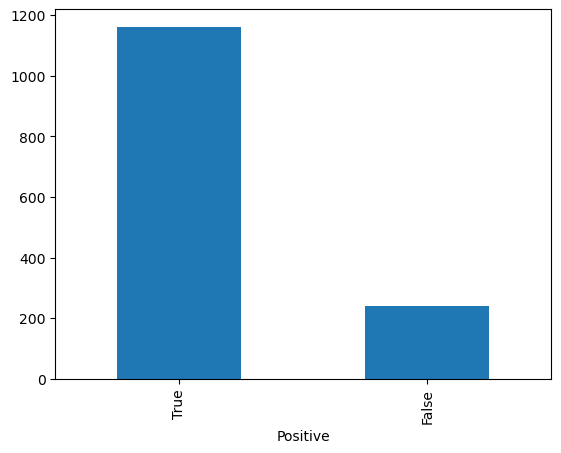

In [14]:
data_fixed["Positive"].value_counts().plot(kind="bar")

In [15]:
data_with_limits = pd.read_csv("./output.csv")

In [16]:
different_runs_delimiters = data_with_limits[data_with_limits["entry_date"] == "entry_date"].index.values

In [17]:
data_with_limits["score"] = pd.to_numeric(data_with_limits["score"], errors="coerce")
data_with_limits = data_with_limits.dropna(subset=["score"])

In [18]:
data_with_limits = data_with_limits.drop_duplicates(subset=["entry_id", "offer_ref"])

In [19]:
data_with_limits["Positive"] = data_with_limits["score"] >= 4

In [20]:
data_with_limits["Positive"].value_counts()

Positive
False    34090
True     22303
Name: count, dtype: int64

In [21]:
data_with_limits["Rating"] = data_with_limits["score"].transform(lambda x: "Positive" if x >= 4 else ("Negative" if x <= 2 else "Medium"))

In [22]:
data_with_limits["top_category"].nunique()

465

In [23]:
data_with_limits["offer_ref"].nunique()

8413

In [24]:
data_with_limits[data_with_limits["Rating"] != "Medium"]

,entry_date,entry_id,full_category,offer_ref,product_title,purchase_date,review_text,score,top_category,Positive,Rating
0,2021-01-17 21:55:15,13788058,Sport i rekreacja/Sporty zimowe/Sanki i ślizga...,83158301,Springos Drewniane Z Oparciem SAN001,2021-01-11 13:35:10,😑😑,1.0,Sanki,False,Negative
1,2021-01-17 21:55:15,15442912,Sport i rekreacja/Sporty zimowe/Sanki i ślizga...,83158301,Springos Drewniane Z Oparciem SAN001,2021-01-11 13:35:10,Lekkie i jak jesteś na kuligu to szypko spadas...,1.5,Sanki,False,Negative
2,2023-12-06 21:25:40,18181118,Sport i rekreacja/Sporty zimowe/Sanki i ślizga...,123702927,Ślizgacz sanki dmuchane na śnieg koło opona,2023-11-30 21:30:26,"Niestety, zamiast opony otrzymałam pingwina,wi...",1.5,Ślizgacze,False,Negative
4,2023-12-15 09:33:06,18213380,Sport i rekreacja/Sporty zimowe/Sanki i ślizga...,123702927,Ślizgacz sanki dmuchane na śnieg koło opona,2023-12-11 14:15:39,Bardzo dobry,5.0,Ślizgacze,True,Positive
5,2021-12-24 10:19:18,15421040,Sport i rekreacja/Sporty zimowe/Sanki i ślizga...,100926509,Acra Sanki Bob Bambi Rider Turkusowe,2021-12-10 00:12:54,NIe wiadomo,1.0,Sanki,False,Negative
...,...,...,...,...,...,...,...,...,...,...,...
72952,2019-07-22 22:46:38,11515861,Sprzęt AGD/Małe AGD do domu/Oczyszczacze powie...,74088790,Oczyszczacz powietrza SHARP UA-HG50E-L,2019-11-28 08:28:13,"5,0/5",5.0,Oczyszczacze powietrza,True,Positive
72953,2019-07-22 22:46:38,11666049,Sprzęt AGD/Małe AGD do domu/Oczyszczacze powie...,74088790,Oczyszczacz powietrza SHARP UA-HG50E-L,2019-11-28 08:28:13,Produkt wysokiej jakości.,5.0,Oczyszczacze powietrza,True,Positive
72954,2019-07-22 22:46:38,11825415,Sprzęt AGD/Małe AGD do domu/Oczyszczacze powie...,74088790,Oczyszczacz powietrza SHARP UA-HG50E-L,2019-11-28 08:28:13,Super,5.0,Oczyszczacze powietrza,True,Positive
72955,2019-07-22 22:46:38,12010034,Sprzęt AGD/Małe AGD do domu/Oczyszczacze powie...,74088790,Oczyszczacz powietrza SHARP UA-HG50E-L,2019-11-28 08:28:13,Sprzęt pro,5.0,Oczyszczacze powietrza,True,Positive


<Axes: xlabel='Rating'>

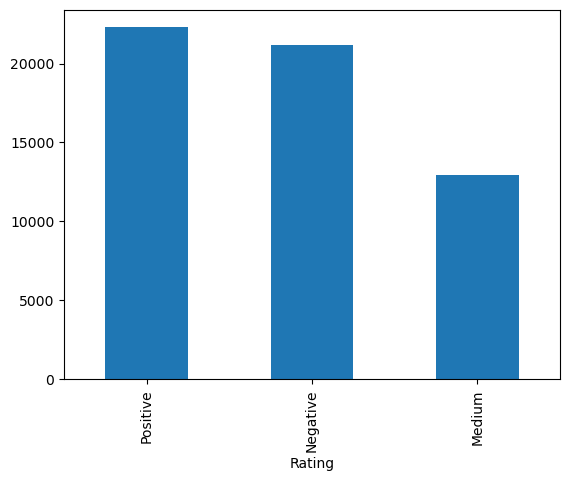

In [25]:
data_with_limits["Rating"].value_counts().plot(kind="bar")

In [26]:
data_with_limits["top_category"].value_counts().iloc[:50]

top_category
Nutrikosmetyki i leki dermatologiczne    2112
Perfumy i wody damskie                   1676
Perfumy i wody męskie                    1514
Ekspresy ciśnieniowe                     1367
Układ moczowy i płciowy                  1367
Suche                                    1339
Smartfony                                1239
Przeziębienie i grypa                    1226
Preparaty medycyny naturalnej            1086
Układ pokarmowy                           948
Szampony do włosów                        930
Dokanałowe                                922
Soczewki kontaktowe                       829
4K UHD                                    783
Klasyczne telefony komórkowe              760
Farby                                     748
Nauszne                                   726
Twarz                                     707
Odkurzacze tradycyjne                     707
Odkurzacze pionowe                        706
Podkłady w kremie                         674
Oczyszczacze powietrz

In [27]:
data_with_limits["review_text"] = data_with_limits["review_text"].str.lower()

In [28]:
print(data_with_limits["Rating"].value_counts())
print("Total Reviews Scraped:", len(data_with_limits["review_text"]), "\n")
print(data_with_limits.drop_duplicates(["review_text", "Rating"])["Rating"].value_counts())
print("Uniquely Phrased Reviews Scraped: ", len(data_with_limits.drop_duplicates("review_text")["review_text"]), "\n")


Rating
Positive    22303
Negative    21155
Medium      12935
Name: count, dtype: int64
Total Reviews Scraped: 56393 

Rating
Negative    19066
Positive    13477
Medium      10512
Name: count, dtype: int64
Uniquely Phrased Reviews Scraped:  42493 

